# Memo - Machine Learning 

In [1]:
import pandas as pd
import numpy as np

## Import and read data

In [2]:
df = pd.read_csv('UTSEUS-anjuke-real-estate-baoshan.csv')
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


## Get the data we care about

In [4]:
df.columns

Index(['id', 'address', 'longitude', 'latitude', 'bedroom', 'room', 'surface',
       'price', 'onesquaremeter', 'tags', 'district', 'neighborhood', 'done'],
      dtype='object')

In [5]:
df_modeling = df[['longitude','latitude','bedroom','room','surface','price','onesquaremeter']]

## Remove missing values

In [6]:
df_modeling = df_modeling.dropna()

## See the distribution

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

#### This will first sort the series and then plot, ignoring the index of the series:

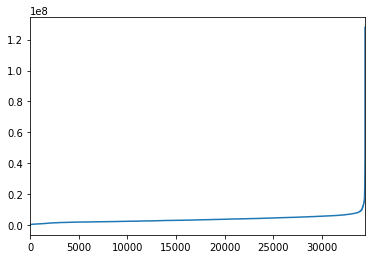

In [9]:
df_modeling['price'].sort_values().plot(use_index=False)

## Scale the data

## Add categorical data

In [13]:
# Separate df data and ML data
X = df[['longitude', 'latitude', 'bedroom', 'room', 'surface']] #features
Y = df['price'] #target variable

In [12]:
Z = pd.DataFrame.copy(Y)
Z[Y <= np.quantile(Y,0.25)] = "Very Cheap" # could also use class 1,2,3,4
Z[(Y > np.quantile(Y, 0.25)) & (Y <= np.quantile(Y, 0.5))] = "Cheap"
Z[(Y > np.quantile(Y, 0.5)) & (Y <= np.quantile(Y, 0.75))] = "Expensive"
Z[Y > np.quantile(Y,0.75)] = "Very Expensive"

## Training and testing sets creation

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.3, shuffle=True)

## Classification

### 1. AdaBoost (Boosting)

n_estimators : The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

In [21]:
# We  want to determine the best param
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [10, 50, 100]}
clf = AdaBoostClassifier()
search = GridSearchCV(clf, param_grid, cv= 5)
search.fit(X_train, Z_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
#Best model
clf = AdaBoostClassifier(n_estimators=50)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.6708958837772397

### 2. Support Vector Machines

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
scores.mean()

### 3. Decision Tree

In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.871089588377724

[Text(418.5, 453.0, 'X[4] <= 78.5\nentropy = 0.75\nsamples = 24091\nvalue = [5932, 6148, 6156, 5855]'),
 Text(209.25, 271.8, 'X[4] <= 51.5\nentropy = 0.623\nsamples = 12664\nvalue = [5147, 1943, 5499, 75]'),
 Text(104.625, 90.59999999999997, 'entropy = 0.265\nsamples = 4296\nvalue = [653, 18, 3625, 0]'),
 Text(313.875, 90.59999999999997, 'entropy = 0.608\nsamples = 8368\nvalue = [4494, 1925, 1874, 75]'),
 Text(627.75, 271.8, 'X[4] <= 101.5\nentropy = 0.601\nsamples = 11427\nvalue = [785, 4205, 657, 5780]'),
 Text(523.125, 90.59999999999997, 'entropy = 0.631\nsamples = 7253\nvalue = [670, 3553, 585, 2445]'),
 Text(732.375, 90.59999999999997, 'entropy = 0.336\nsamples = 4174\nvalue = [115, 652, 72, 3335]')]

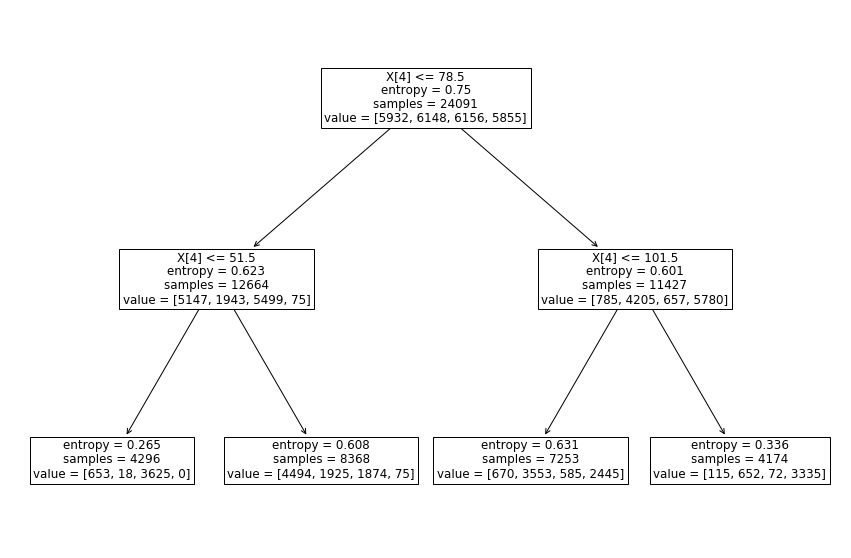

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, Z_train)
plt.figure(figsize=(15,10))
tree.plot_tree(clf)

### 4. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=25, random_state=0, n_estimators = 100)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.6166585956416465

### 5. K nearest Neighbors

In [39]:
from sklearn import neighbors, datasets
n_neighbors = 2000
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
scores = cross_val_score(clf, X, Z, cv=5)
clf.fit(X, Z)
np.mean(scores)

0.6630341790498113

### Cross Validation ft. Decision Tree

In [37]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth = 2)
scores = cross_val_score(clf, X, Z, cv=5)
np.mean(scores)

0.5182422933889637